## Improving a model

First predictions = Baseline predictions
First model = Baseline model

**From a data perspective:**
- Could we collect more data ? (generally, the more data, the better)
- Could we improve our data ?

**From a model prespective:**
- Is there a better model we could use ?
- Could we improve the current model ?

**Parameters** =  models finds these patterns in data

**Hyperparamters** = settings on a model that you can adjust to (potentially) imporve its ability to find patterns

**3 ways to adjust hyperparameters**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GrivSearchCV

In [1]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try to adjust 

- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_pred):
    """
    Perform evaluation comparison on y_true labels vs. y_pred labels 
    on a classification model
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Accuracy: {accuracy * 100:.2f} %")
    print(f"Precision: {precision:.2f} ")
    print(f"Recall: {recall:.2f} ")
    print(f"F1: {f1:.2f} ")
    
    return metric_dict
    

In [44]:
# Import dataset
import pandas as pd
heart_disease = pd.read_csv("../data/heart-disease.csv")

# Make results reproducible
import numpy as np
np.random.seed(42)

# Shuffle data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split in train, val and test set
train_split = round(0.7 * len(heart_disease_shuffled))
val_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]
X_test, y_test = X[val_split:], y[val_split:]

# Fit a classifier
clf_1 = RandomForestClassifier()
clf_1.fit(X_train, y_train)

# Make baseline predictions
y_pred = clf_1.predict(X_val)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_val, y_pred)

Accuracy: 82.22 %
Precision: 0.81 
Recall: 0.88 
F1: 0.85 


In [45]:
np.random.seed(42)

# Create a second classifier with differet hyperparameters
clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_pred = clf_2.predict(X_val)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_val, y_pred)


Accuracy: 80.00 %
Precision: 0.81 
Recall: 0.84 
F1: 0.82 


#### RandomizedSearchCV

In [53]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split in train, val and test set
train_split = round(0.7 * len(heart_disease_shuffled))
val_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]
X_test, y_test = X[val_split:], y[val_split:]
# Instantiate a classifier
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of model to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [56]:
# which parameters got the best results
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [57]:
# make predictions with the best hyperparamters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 82.61 %
Precision: 0.84 
Recall: 0.84 
F1: 0.84 


#### GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV
grid = {"n_estimators": [100, 200, 500],
        "max_depth": [None],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1, 2]}

np.random.seed(42)

# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split in train, val and test set
train_split = round(0.7 * len(heart_disease_shuffled))
val_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]
X_test, y_test = X[val_split:], y[val_split:]
# Instantiate a classifier
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid,
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [54]:
gs_clf.best_params_ 

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [55]:
# make predictions with the best hyperparamters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 82.61 %
Precision: 0.87 
Recall: 0.80 
F1: 0.83 


**Let's compare our different model metrics**

In [59]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics, 
                               "grid search": gs_metrics})
compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.82,0.80,0.83,0.83
precision,0.81,0.81,0.84,0.87
recall,0.88,0.84,0.84,0.80
f1,0.85,0.82,0.84,0.83


<AxesSubplot:>

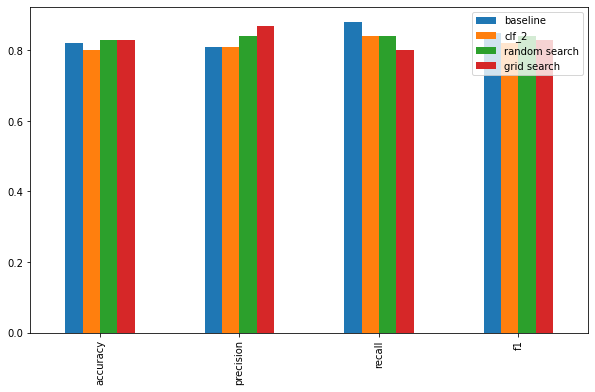

In [60]:
compare_metrics.plot.bar(figsize=(10,6))